### This notebook assumes that the relevant CrI3 scans have already been generated using the included script.

In [4]:
#More complex example of pyMACS usage

import sys
import os
import numpy as np
cwd = os.getcwd()
print(cwd)
#Add the directory of the module to the path.
cwd = os.getcwd()
#Add the directory of the module to the path.
sys.path.append('/'.join(cwd.split('/')[0:-1]))
from virtualMACS import VirtualMACS
import mcstasscript as ms

macs_instr = VirtualMACS('cri3_experiment',cifName='CrI3.cif',useOld=True)
macs_instr.sample.formula_weight=432.7
numthreads=8

/mnt/c/Users/tjh/OneDrive - NIST/GitHub/pyMACS/pyMACS/Demonstration
 Material.formula_weight=(val)
#########################
Old simulations found in /mnt/c/Users/tjh/OneDrive - NIST/GitHub/pyMACS/pyMACS/Demonstration/cri3_experiment/Kidney_simulations/
 
Successfully combined old simulations into /mnt/c/Users/tjh/OneDrive - NIST/GitHub/pyMACS/pyMACS/Demonstration/cri3_experiment/Kidney_simulations/cri3_experiment_total.csv

Data matrix instantiated and ready to use.
#########################


In [5]:
print(sys.path)

['/mnt/c/Users/tjh/OneDrive - NIST/GitHub/pyMACS/pyMACS/Demonstration', '/home/tjh/mambaforge/envs/mantid/lib/python38.zip', '/home/tjh/mambaforge/envs/mantid/lib/python3.8', '/home/tjh/mambaforge/envs/mantid/lib/python3.8/lib-dynload', '', '/home/tjh/mambaforge/envs/mantid/lib/python3.8/site-packages', 'C:\\Users\\tjh\\OneDrive - NIST\\GitHub\\pyMACS\\pyMACS', '/mnt/c/Users/tjh/OneDrive - NIST/GitHub/pyMACS/pyMACS', '/mnt/c/Users/tjh/OneDrive - NIST/GitHub/pyMACS/pyMACS']


In [6]:
macs_instr.sample.orient_u = [1,0,0]
macs_instr.sample.orient_v = [-1,2,0]

In [7]:
#To make plots, first project the data into Q-E-space
macs_instr.data.project_data_QE(which_data='mcstas')

1

# Elastic Scattering Slice

In [8]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CrI$_3$ $\\hbar\\omega$=[-1,1] meV')

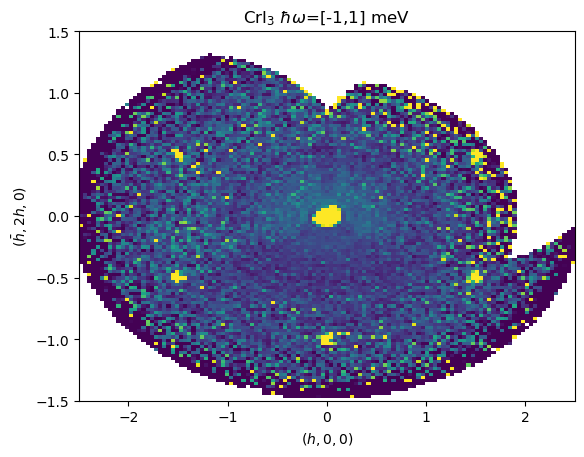

In [9]:
Qu_el, Qv_el, I_el, Err_el = macs_instr.data.take_slice([-2.5,2.5,120],[-1.5,1.5,120],[-1,1],which_data='mcstas')
fig,ax = plt.subplots(1,1)
ax.pcolormesh(Qu_el,Qv_el,I_el.T,vmin=0,vmax=2)
ax.set_xlabel(r'$(h,0,0)$')
ax.set_ylabel(r'$(\bar{h},2h,0)$')
ax.set_title("CrI$_3$ $\hbar\omega$=[-1,1] meV")

## Some Inelastic Slices

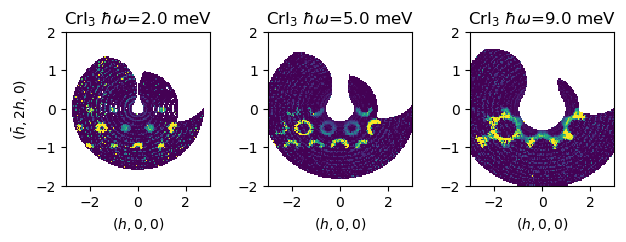

In [10]:
omegas = [2,5,9]
fig,ax = plt.subplots(1,3,figsize=(3.54*2,2))
fig.subplots_adjust(wspace=0.4)
for i,e in enumerate(omegas):
    Qu, Qv, I, Err = macs_instr.data.take_slice([-3,3,120],[-2,2,120],[e-0.5,e+0.5],which_data='mcstas')
    ax[i].pcolormesh(Qu,Qv,I.T,vmin=0,vmax=5e-1)
    ax[i].set_xlabel(r'$(h,0,0)$')
    if i==0:
        ax[i].set_ylabel(r'$(\bar{h},2h,0)$')
    ax[i].set_title(f"CrI$_3$ $\hbar\omega$={e:.1f} meV")

## Example dispersion plot

Text(0.5, 1.0, 'CrI$_3$ Dispsersion, ($\\bar{h}$,2$h$,0)=[-0.6,-0.4]')

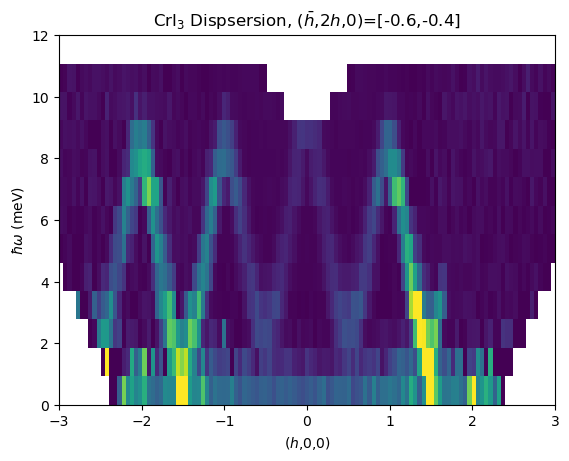

In [11]:
fig,ax = plt.subplots(1,1)
H,E,I,Err=macs_instr.data.take_slice([-3,3,120],[-0.6,-0.4],[0,12,14])
ax.pcolormesh(H,E,I.T,vmin=0,vmax=5e-1)
ax.set_xlabel(r"($h$,0,0)")
ax.set_ylabel(r"$\hbar\omega$ (meV)")
ax.set_title("CrI$_3$ Dispsersion, ("+r"$\bar{h}$,2$h$,0)=[-0.6,-0.4]")

## Finally, example of a cut.

Text(0.5, 1.0, 'CrI$_3$ $(h00)$=[0.45,0.55], $(\\bar{h},2h,0)$=[-0.55,-0.45]')

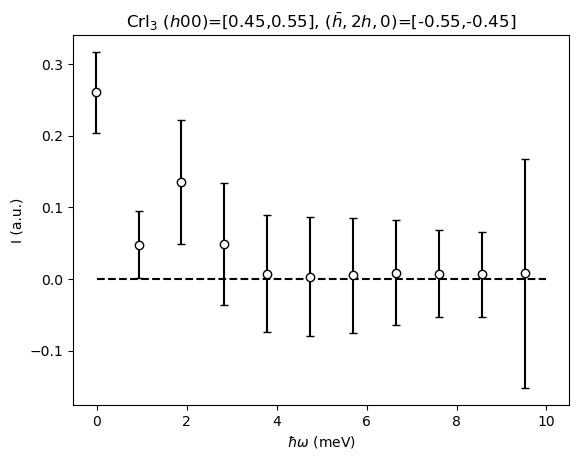

In [12]:
e,I,err = macs_instr.data.take_cut([0.45,0.55],[-0.55,-0.45],[-0.5,10,12])
fig,ax = plt.subplots(1,1)
ax.errorbar(e,I,err,ls=' ',mfc='w',mec='k',color='k',capsize=3,marker='o')
ax.plot(np.linspace(0,10,1000),np.zeros(1000),'k--')
ax.set_xlabel("$\hbar\omega$ (meV)")
ax.set_ylabel("I (a.u.)")
ax.set_title(r"CrI$_3$ $(h00)$=[0.45,0.55], $(\bar{h},2h,0)$=[-0.55,-0.45]")

In [14]:
macs_instr.kidney.Ef

5.0